In [20]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import BoundaryNorm
import random

In [2]:
data=np.loadtxt("traindataset2_32.csv",delimiter=',',dtype=str)
data=data[1:,:]

data=data.astype(np.float64)

partition=int(0.8*len(data))
train_data=data[:partition]
validation_data=data[partition:]

col_len=np.shape(data)[1]-1
X_train=train_data[:,:col_len]
Y_train=train_data[:,col_len:]

X_validation=validation_data[:,:col_len]
Y_validation=validation_data[:,col_len:]

In [3]:
def KNN(X_train,Y_train,X_test,k):
    Y_predlabels=[]
    #prediction labels array
    
    for i in range(len(X_test)):
        distances=[]
        for j in range(len(X_train)):
            dist=math.sqrt((X_train[j][0]-X_test[i][0])**2 + (X_train[j][1] - X_test[i][1])**2)
            distances.append((dist,Y_train[j]))
            #appending the distances and the respective labels
        distances.sort(key = lambda x: x[0])
        #sorting the distances
        k_nearest_labels=[label for _, label in distances[:k]]
        #collecting the first k nearest labels 
        labels,counts=np.unique(k_nearest_labels,return_counts = True)
        
        max_count=np.argmax(counts)
        Y_predlabels.append(labels[max_count])
        # Return the label with maximum count
                    
    return Y_predlabels

In [4]:
def accuracy(X_train,Y_train,X_test,Y_test,k):
    
    y_true=Y_test
    y_pred=KNN(X_train,Y_train,X_test,k)
    
    correct=0
    for i in range(len(Y_test)):
        if y_pred[i]==y_true[i]: 
            correct+=1
    total=len(y_true)
    acc=correct / total
    return acc

In [5]:
k_values=np.linspace(1,200,num=200,findtype=int)
accuracies=[accuracy(X_train,Y_train,X_validation,Y_validation,k) for k in k_values]
df=pd.DataFrame({'k value':k_values,'accuracy':accuracies})
df.to_csv('TrainDataSet2Accuracy.csv')
print("Accuracy of train data for different values of k")
print()
print(df)

Accuracy of train data for different values of k

     k value  accuracy
0          1       1.0
1          2       1.0
2          3       1.0
3          4       1.0
4          5       1.0
..       ...       ...
195      196       1.0
196      197       1.0
197      198       1.0
198      199       1.0
199      200       1.0

[200 rows x 2 columns]


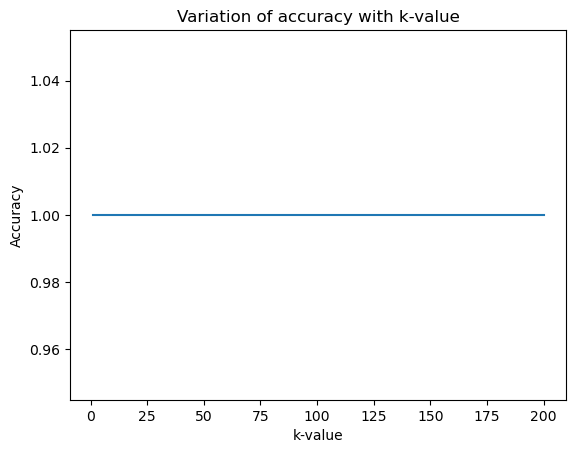

In [6]:
plt.plot(k_values,accuracies)
plt.title("Variation of accuracy with k-value")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.show()

In [7]:
Testdata=np.loadtxt('testdataset2_32.csv',delimiter=',',dtype='str')
Testdata=Testdata[1:,:]

Testdata=Testdata.astype(np.float64)

X_testdata=Testdata[:,:-1]
Y_testdata=Testdata[:,-1]

# value of k for the best model : 1

print(f'Accuracy of train data for best model : {accuracy(X_train,Y_train,X_validation,Y_validation,1)}')
print(f'Accuracy of test data for best model : {accuracy(X_train,Y_train,X_testdata,Y_testdata,1)}')

Accuracy of train data for best model : 1.0
Accuracy of test data for best model : 1.0


Index(['x', 'y', 'label'], dtype='object')


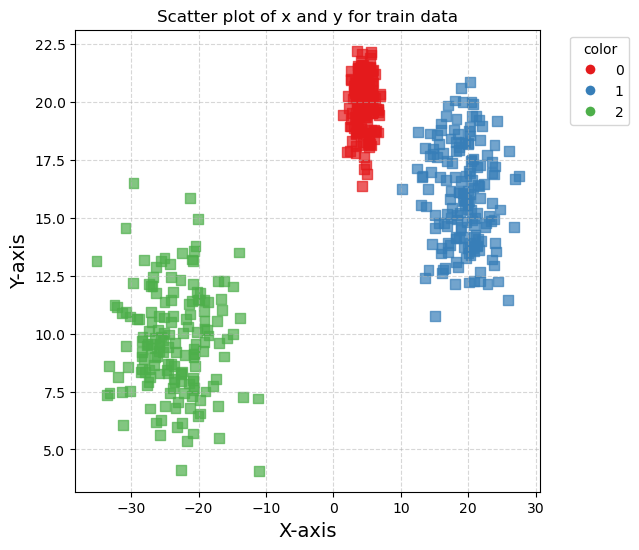

In [8]:
df=pd.read_csv('traindataset2_32.csv')

print(df.columns)

fig,ax=plt.subplots(figsize=(6,6))

colors={0:'#e41a1c',1:'#377eb8',2:'#4daf4a'}

ax.scatter(df['x'],df['y'],c=df['label'].map(colors),s=50,marker='s',alpha=0.7)
# plotting the scatter plot

handles=[Line2D([0],[0],marker='o',color='w',markerfacecolor=v,label=k,markersize=8) for k,v in colors.items()]
ax.legend(title='color',handles=handles,bbox_to_anchor=(1.05,1),loc='upper left')
# adding a legend to the plot

ax.grid(True,linestyle='--',alpha=0.5)
#add gridlines to the plot

ax.set_xlabel('X-axis',fontsize=14)
ax.set_ylabel('Y-axis',fontsize=14)
# set axis labels

ax.set_title('Scatter plot of x and y for train data')
# set plot title

plt.show()

Index(['x', 'y', 'label'], dtype='object')


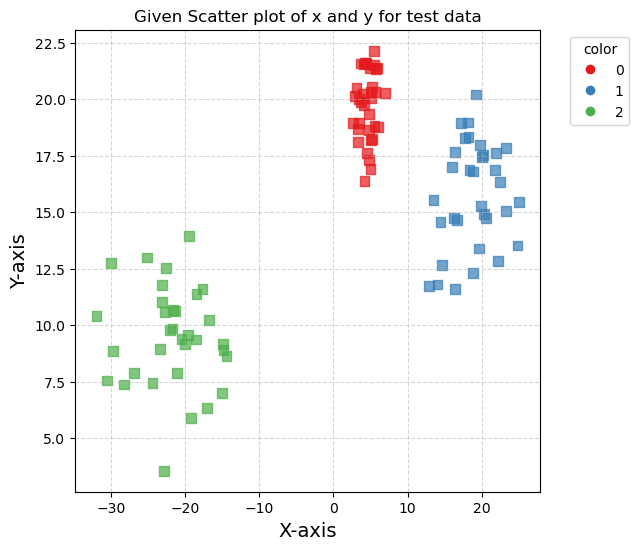

In [9]:
df_testgiven=pd.read_csv('testdataset2_32.csv')

print(df_testgiven.columns)

fig,ax=plt.subplots(figsize=(6,6))

colors={0:'#e41a1c',1:'#377eb8',2:'#4daf4a'}

ax.scatter(df_testgiven['x'],df_testgiven['y'],c=df_testgiven['label'].map(colors),s=50,marker='s',alpha=0.7)
# plotting the scatter plot

handles=[Line2D([0],[0],marker='o',color='w',markerfacecolor=v,label=k,markersize=8) for k,v in colors.items()]
ax.legend(title='color',handles=handles,bbox_to_anchor=(1.05,1),loc='upper left')
# adding a legend to the plot

ax.grid(True,linestyle='--',alpha=0.5)
#add gridlines to the plot

ax.set_xlabel('X-axis',fontsize=14)
ax.set_ylabel('Y-axis',fontsize=14)
# set axis labels

ax.set_title('Given Scatter plot of x and y for test data')
# set plot title

plt.show()

Index(['x', 'y', 'label'], dtype='object')


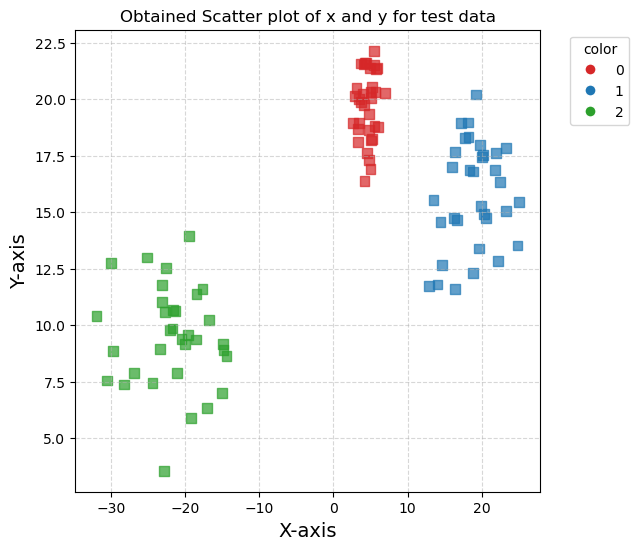

In [10]:
predicted=KNN(X_train,Y_train,X_testdata,1)

df_testpred=pd.read_csv('testdataset2_32.csv')
df_testpred['label']=predicted
print(df_testpred.columns)

fig,ax=plt.subplots(figsize=(6,6))

colors={0:'tab:red',1:'tab:blue',2:'tab:green'}

ax.scatter(df_testpred['x'],df_testpred['y'],c=df_testpred['label'].map(colors),s=50,marker='s',alpha=0.7)
# plotting the scatter plot

handles=[Line2D([0],[0],marker='o',color='w',markerfacecolor=v,label=k,markersize=8) for k,v in colors.items()]
ax.legend(title='color',handles=handles,bbox_to_anchor=(1.05,1),loc='upper left')
# adding a legend to the plot

ax.grid(True,linestyle='--',alpha=0.5)
#add gridlines to the plot

ax.set_xlabel('X-axis',fontsize=14)
ax.set_ylabel('Y-axis',fontsize=14)
# set axis labels

ax.set_title('Obtained Scatter plot of x and y for test data')
# set plot title

plt.show()

# Classification Boundary



In [11]:
df2=np.loadtxt('testdataset2_32.csv',delimiter=',',dtype=str)
df2=df2[1:,:]
df2=df2.astype(np.float64)

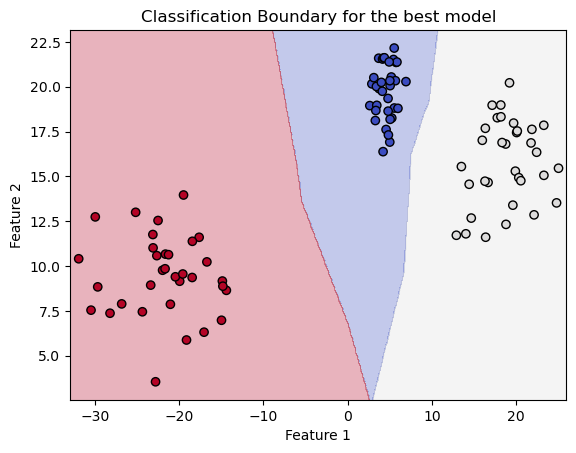

In [21]:
X1=df2[:,0]
X2=df2[:,1]

k=1
#k value for best model

x1_min,x1_max=X1.min()-1,X1.max()+1
x2_min,x2_max=X2.min()-1,X2.max()+1
# the range of x1 and x2

xx,yy=np.meshgrid(np.arange(x1_min,x1_max,0.1),np.arange(x2_min,x2_max,0.1),indexing='ij')
X_test=np.c_[xx.ravel(),yy.ravel()]

y_pred=KNN(X_train,Y_train,X_test,k)
Z=np.array(y_pred).reshape(xx.shape)
# create a grid of points to evaluate the model on

cmap=plt.cm.get_cmap('coolwarm')
norm=BoundaryNorm(np.arange(-0.5,3.5,1),cmap.N)
# Setting up a color map and a normalisation for the plot

plt.figure()
plt.contourf(xx,yy,Z,cmap=cmap,alpha=0.3,norm=norm)
plt.scatter(X1,X2,c=np.array(predicted),cmap=cmap,edgecolor='black',linewidth=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Boundary for the best model')
#plot the decision boundary and the input data

plt.show()
#displaying the plot

# Confusion Matrix

In [1]:
def confusion_matrix(y_true,y_pred):
    labels=np.unique(y_true)
    n=len(labels)
    
    cm=np.zeros((n,n),dtype=int)
    
    for i in range(len(y_true)):
        true_label=np.where(labels==y_true[i])[0][0]
        pred_label=np.where(labels==y_pred[i])[0][0]
        cm[true_label,pred_label]+=1
        
    return cm

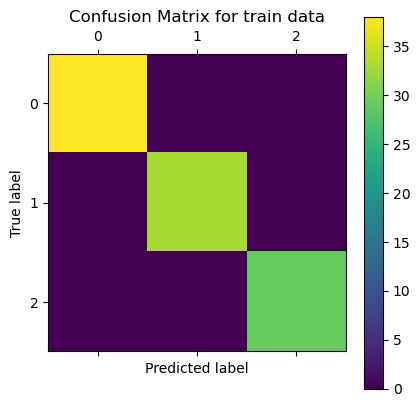

[[38.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 29.]]


In [14]:
y_predtrain=KNN(X_train,Y_train,X_validation,1)
cm1=confusion_matrix(Y_validation,y_predtrain)

plt.matshow(cm1)
plt.colorbar()
#plot the confusion matrix

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for train data')
print()
# naming plot axis and the matrix

plt.show()
#displaying the matrix

length=len(np.unique(df2[:,2]))

cm2=np.zeros(length*length).reshape(length,length)

for i in range(len(Y_validation)):
    cm2[int(Y_validation[i])][int(y_predtrain[i])]+=1

print(cm2)

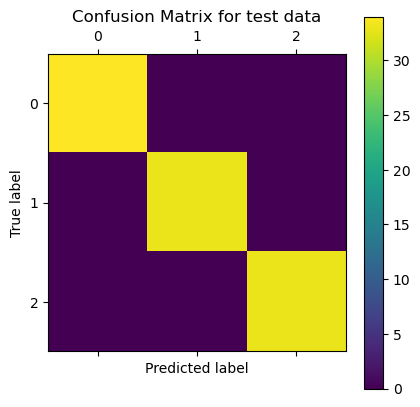

[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


In [15]:
y_predtest=KNN(X_train,Y_train,X_testdata,1)
cm1=confusion_matrix(Y_testdata,y_predtest)

plt.matshow(cm1)
plt.colorbar()

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for test data')
print()

plt.show()

lngth=len(np.unique(df2[:,2]))

cm2=np.zeros(lngth*lngth).reshape(lngth,lngth)

for i in range(len(Y_testdata)):
    cm2[int(Y_testdata[i])][int(y_predtest[i])]+=1

print(cm2)